In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

93.3130572699008
0.010606530474602308
0.010407943398999081
0.010216657864362643
0.010032279027352193
0.009854439977222428
0.009682799311058478
0.009517038957084513
0.009356862216945653
0.009201992001705734
0.009052169239583923
0.008907151436231811
0.008766711370801272
0.00863063591308586
0.008498724948837435
0.008370790401891414
0.008246655343089954
0.008126153177139498
0.008009126899587044
0.00789542841694544
0.007784917923813677
0.007677463331486382
0.00757293974316478
0.007471228971390918
0.0073722190938019004
0.007275804043699521
0.007181883232290101
0.007090361199785553
0.007001147292816956
0.006914155365877736
0.006829303504741234
0.006746513769975023
0.006665711958887951
0.0065868273843686515
0.0065097926692396
0.006434543554877961
0.006361018722950674
0.006289159629229542
0.006218910348560226
0.006150217430095817
0.006083029762023504
0.006017298445074564
0.005952976674139893
0.0058900196274139565
0.005828384362494181
0.005768029718944457
0.005708916226861836
0.00565100602100072

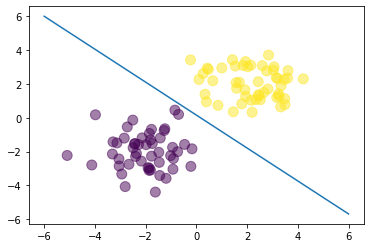

In [5]:
N = 100
D = 2

N_per_class = N//2


X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:N_per_class,:] = X[:N_per_class,:] - 2*np.ones((N_per_class,D))

# center the last 50 points at (2, 2)
X[N_per_class:,:] = X[N_per_class:,:] + 2*np.ones((N_per_class,D))

# labels: first N_per_class are 0, last N_per_class are 1
T = np.array([0]*N_per_class + [1]*N_per_class)

# add a column of ones
# ones = np.array([[1]*N]).T # old
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 1)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))


Y = sigmoid(z)

# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E


# let's do gradient descent 100 times
learning_rate = 0.1
for i in range(500):
    if i % 10 == 0:
        print(cross_entropy(T, Y))

    # gradient descent weight udpate
    w += learning_rate * Xb.T.dot(T - Y)

    # recalculate Y
    Y = sigmoid(Xb.dot(w))


print("Final w:", w)

# plot the data and separating line
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.plot(x_axis, y_axis)